In [3]:
# Predicción de rotación de empleados (churn laboral)

# Paso 1: Entendiendo el problema
# ===============================
# Objetivo: predecir qué empleados tienen mayor riesgo de abandonar la empresa.
# Tipo de problema: clasificación supervisada binaria + segmentación con clustering.

# Paso 2: Carga y exploración de datos
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
# Cargar los datos
file_path = r"C:\Users\marij\Documents\dataset ML\WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(file_path)

# Vista general
print("Forma del dataset:", df.shape)
df.head()

Forma del dataset: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 📄 Descripción de las variables del dataset

| Columna                     | Descripción                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| **Age**                     | Edad del empleado.                                                          |
| **Attrition**               | Si el empleado ha abandonado la empresa (`Yes`) o no (`No`).               |
| **BusinessTravel**          | Frecuencia con la que el empleado viaja por trabajo.                        |
| **Department**              | Departamento en el que trabaja el empleado (Ventas, I+D, RRHH).             |
| **DistanceFromHome**        | Distancia (en millas) desde su casa al trabajo.                             |
| **Education**               | Nivel educativo (1=Menor, 5=Mayor).                                         |
| **EducationField**          | Área de formación (Ciencias, Marketing, Medicina, etc.).                    |
| **EnvironmentSatisfaction** | Grado de satisfacción con el entorno laboral (1 a 4).                      |
| **Gender**                  | Género del empleado.                                                        |
| **JobRole**                 | Cargo o puesto de trabajo específico.                                       |
| **JobSatisfaction**         | Grado de satisfacción con su trabajo (1 a 4).                               |
| **MaritalStatus**           | Estado civil (Soltero, Casado, Divorciado).                                |
| **MonthlyIncome**           | Ingreso mensual.                                                            |
| **NumCompaniesWorked**      | Número de empresas anteriores en las que ha trabajado.                      |
| **OverTime**                | Si realiza horas extra (`Yes` o `No`).                                      |
| **PercentSalaryHike**       | Porcentaje del último aumento salarial.                                    |
| **StockOptionLevel**        | Nivel de participación accionarial.                                        |
| **TotalWorkingYears**       | Años totales de experiencia laboral.                                        |
| **TrainingTimesLastYear**   | Número de formaciones completadas el último año.                           |
| **WorkLifeBalance**         | Equilibrio entre vida personal y trabajo (1=Malo, 4=Excelente).             |
| **YearsAtCompany**          | Años que lleva en la empresa.                                              |
| **YearsInCurrentRole**      | Años en su puesto actual.                                                  |
| **YearsSinceLastPromotion** | Años desde la última promoción.                                            |
| **YearsWithCurrManager**    | Años trabajando con el actual supervisor.                                   |


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

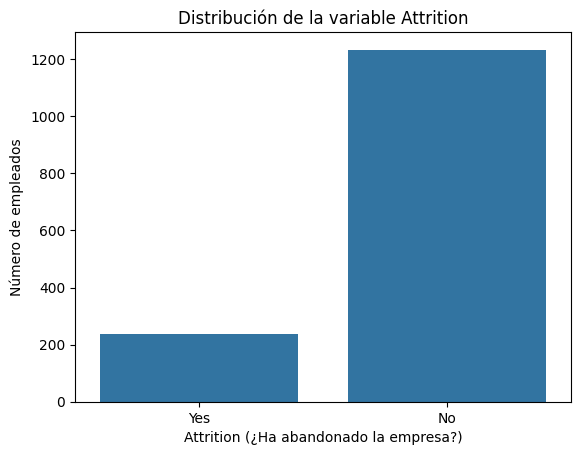

In [6]:
sns.countplot(x='Attrition', data=df)
plt.title('Distribución de la variable Attrition')
plt.xlabel('Attrition (¿Ha abandonado la empresa?)')
plt.ylabel('Número de empleados')
plt.show()

In [7]:
# Conteo
print(df['Attrition'].value_counts())

# Porcentaje
print(df['Attrition'].value_counts(normalize=True) * 100)

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [8]:
cols_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df.drop(columns=cols_to_drop, inplace=True)

In [9]:
target = 'Attrition'

cat_features = []
num_features = []

for col in df.columns:
    if col == target:
        continue
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        cat_features.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
        num_features.append(col)

In [10]:
cat_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [11]:
num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [10]:
# Visualizamos los valores de las columnas numéricas para comprovar si son categoricas.
for col in num_features:
    print(df[col].value_counts().sort_index())

Age
18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
Name: count, dtype: int64
DailyRate
102     1
103     1
104     1
105     1
106     1
       ..
1492    1
1495    3
1496    2
1498    1
1499    1
Name: count, Length: 886, dtype: int64
DistanceFromHome
1     208
2     211
3      84
4      64
5      65
6      59
7      84
8      80
9      85
10     86
11     29
12     20
13     19
14     21
15     26
16     32
17     20
18     26
19     22
20     25
21     18
22     19
23     27
24     28
25     25
26     25
27     12
28     23
29     27
Name: count, dtype: int64
Education
1    170
2    282
3    572
4    398
5     48
Name: count, dtype: int64
Environmen

In [12]:
df_corr = df.copy()
df_corr['Attrition'] = df_corr['Attrition'].map({'No': 0, 'Yes': 1})

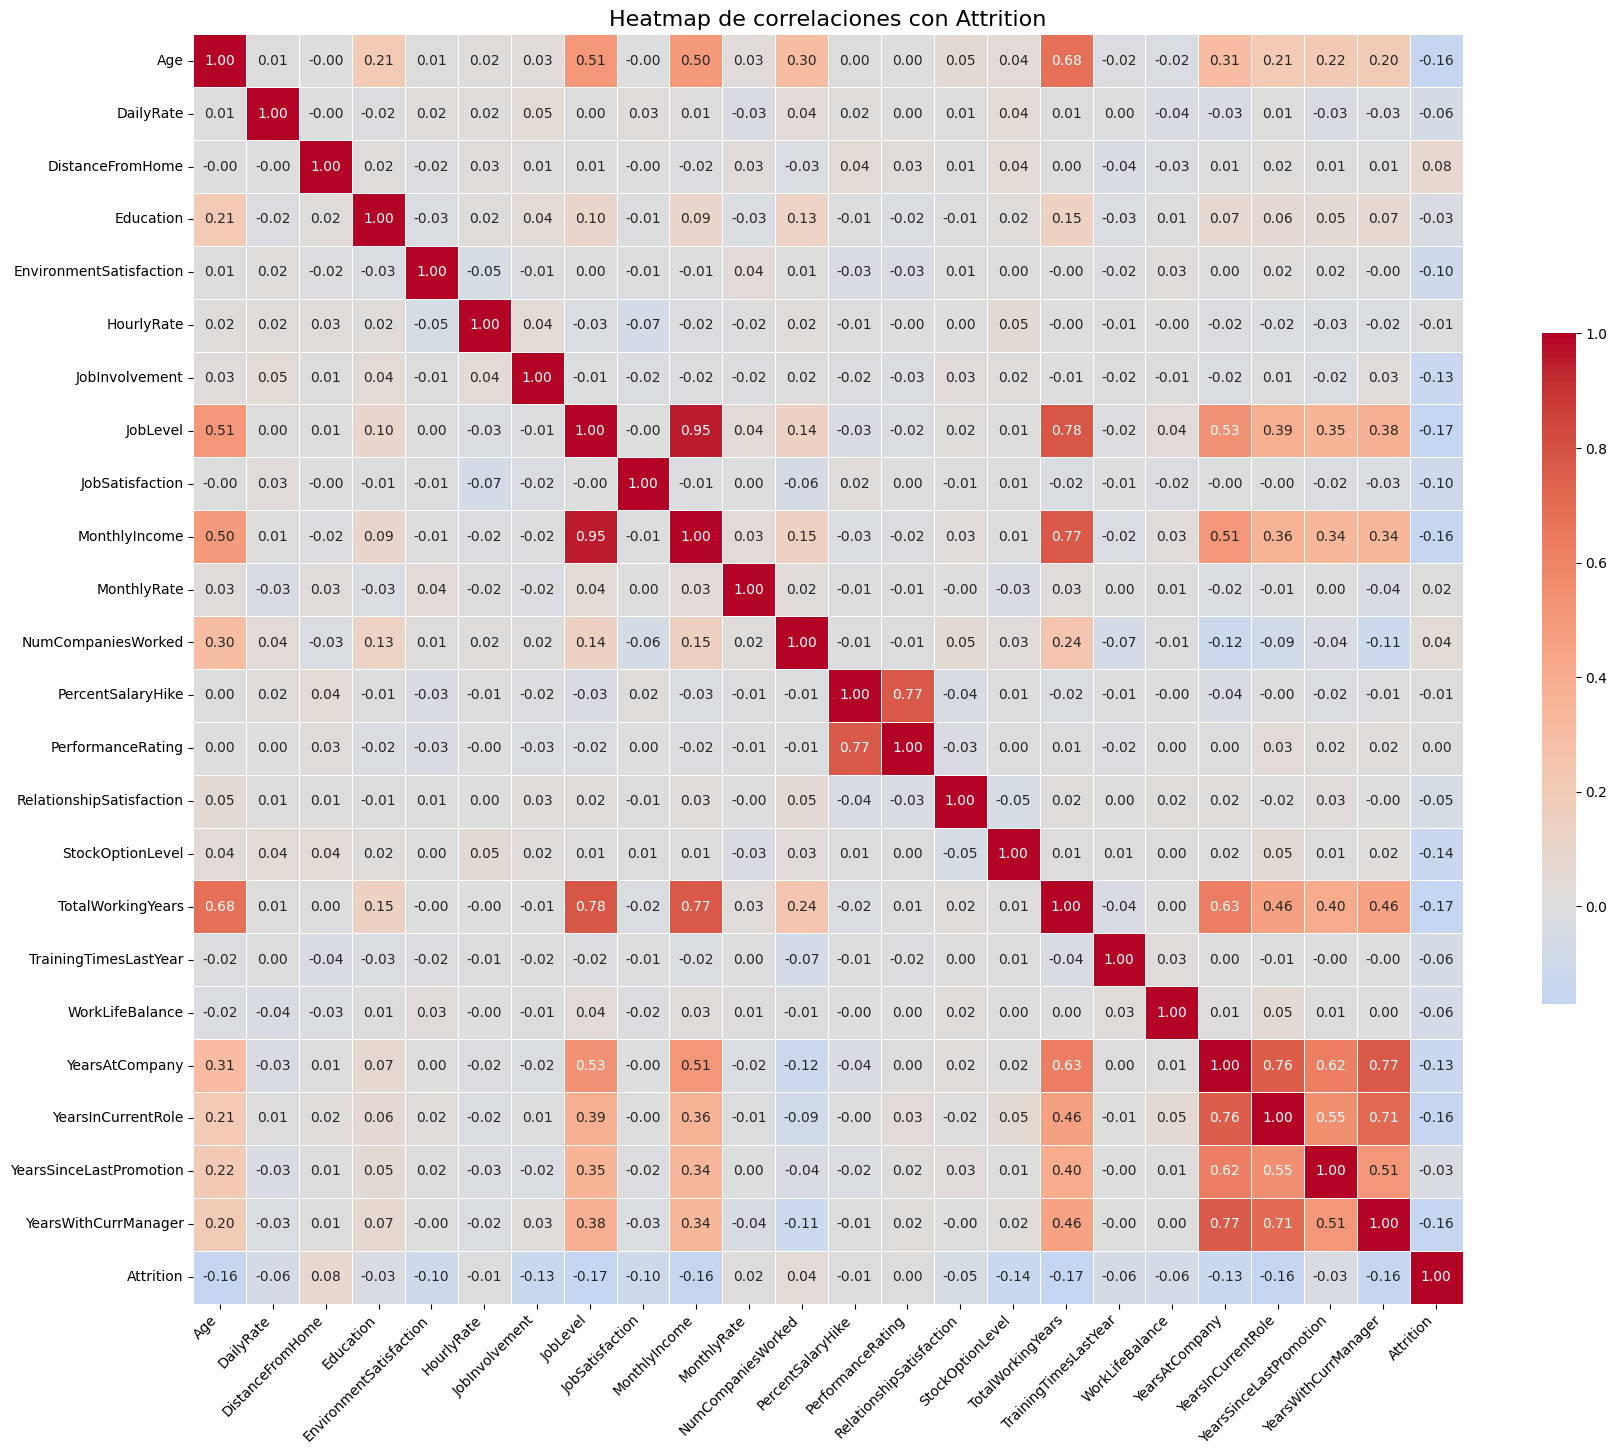

In [13]:
# Seleccionamos columnas numéricas + Attrition codificada
df_num = df_corr[num_features + ['Attrition']]

# Matriz de correlación
corr_matrix = df_num.corr()

# Heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .5}
)
plt.title("Heatmap de correlaciones con Attrition", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
# Estas son las numéricas que vamos a tratar como categóricas:
num_as_cat = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance'
]

# Movemos de num_features a cat_features
for col in num_as_cat:
    if col in num_features:
        num_features.remove(col)
        cat_features.append(col)

In [15]:
import math

def plot_numeric_distributions(df, num_features, target, cols=3, kde=True):
    rows = math.ceil(len(num_features) / cols)
    plt.figure(figsize=(cols * 5, rows * 4))

    for i, col in enumerate(num_features):
        if df[col].nunique() <= 1:
            continue  # salta columnas constantes

        plt.subplot(rows, cols, i + 1)
        sns.histplot(
            data=df,
            x=col,
            hue=target,
            kde=kde,
            stat='density',
            common_norm=False,
            palette='Set2',
            alpha=0.6
        )
        plt.title(f'{col} vs {target}')
        plt.xlabel(col)
        plt.ylabel('Densidad')

    plt.tight_layout()
    plt.show()

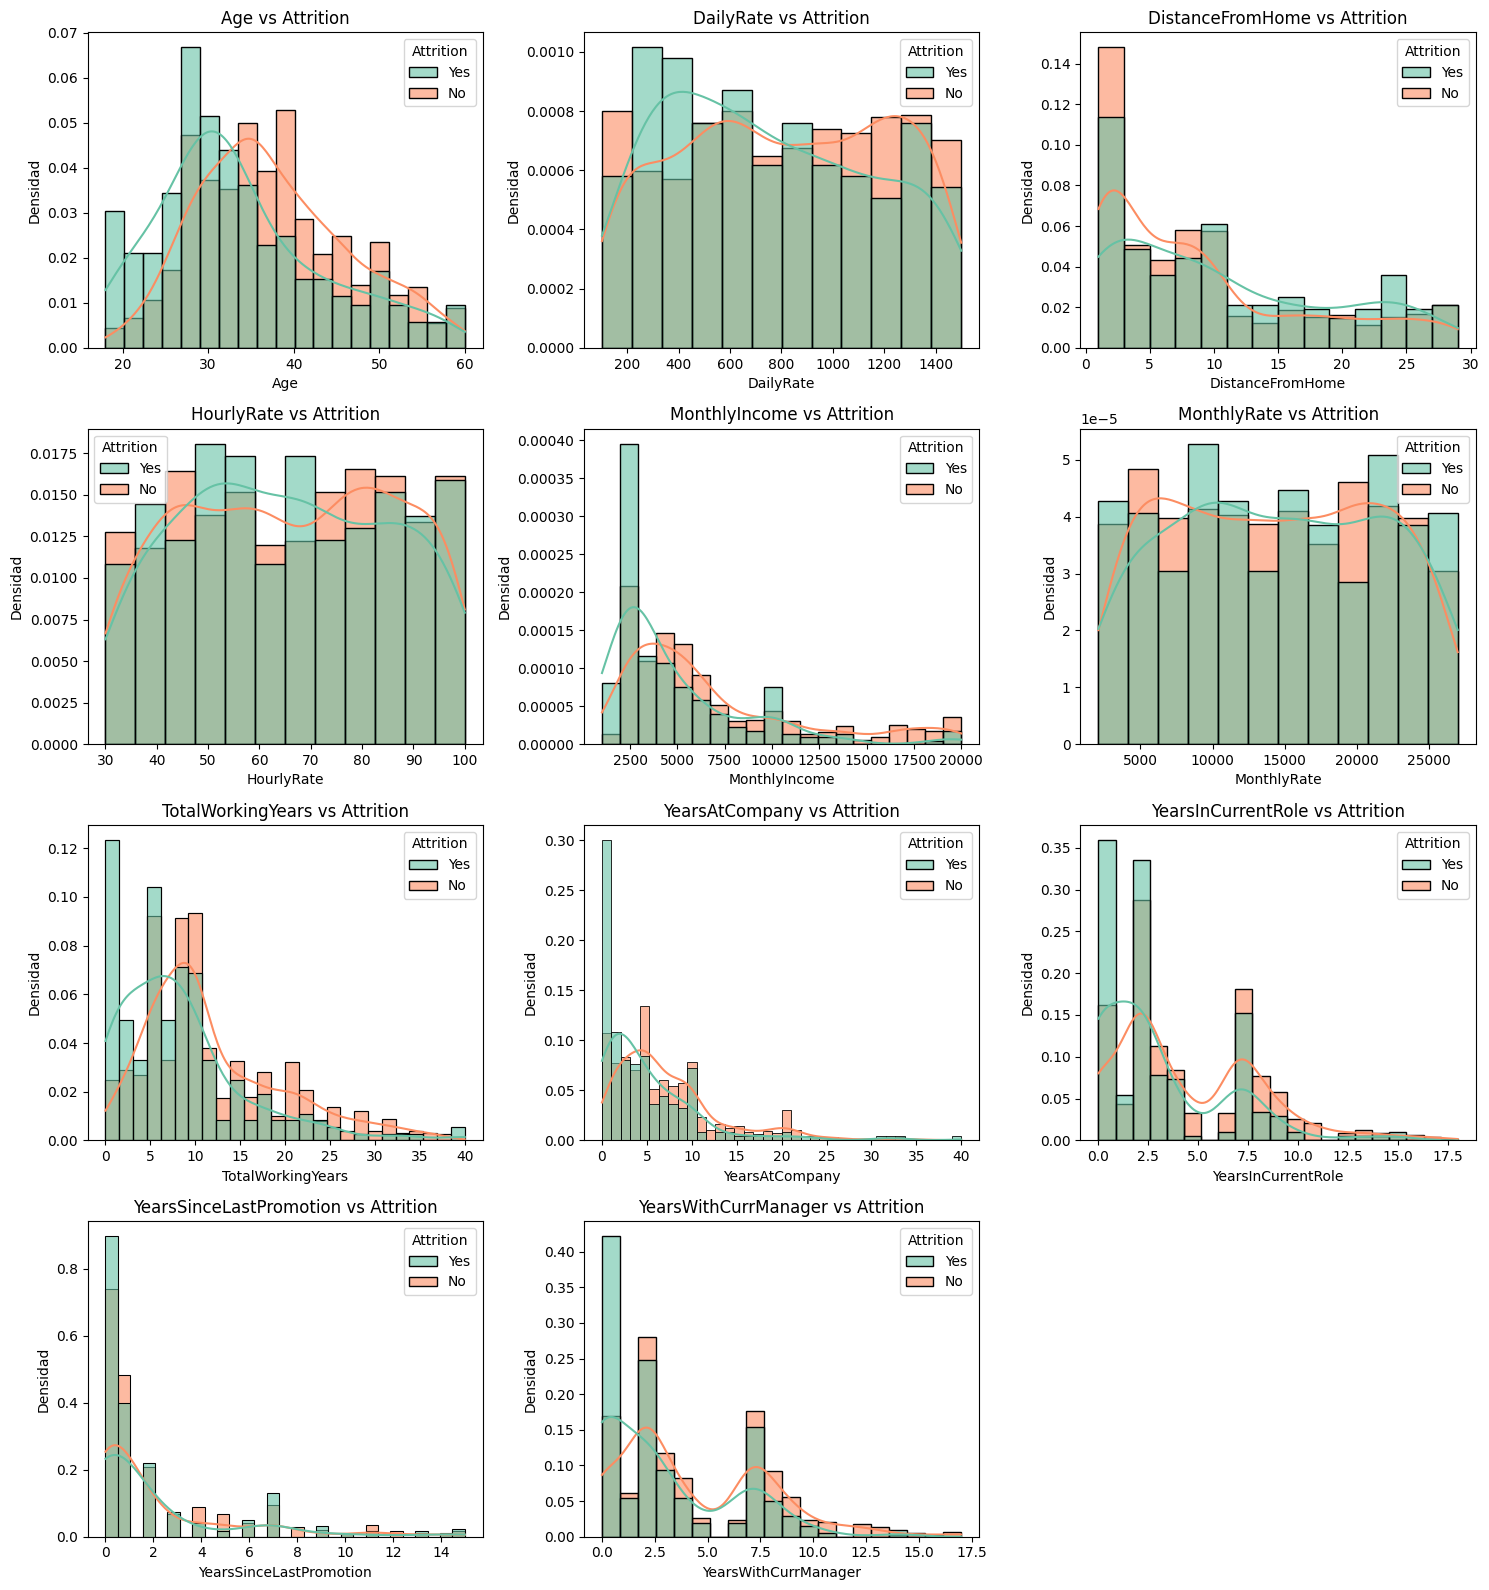

In [16]:
plot_numeric_distributions(df, num_features, target='Attrition')


In [17]:
cols_to_drop = ['DailyRate', 'MonthlyRate', 'HourlyRate']

df_limpio = df.drop(columns=cols_to_drop)

In [18]:
df_limpio

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,2,...,3,4,0,17,3,2,9,6,0,8


In [19]:
from scipy.stats import chi2_contingency
# Seleccionamos variables categóricas (excluyendo la target)
cat_cols = df_limpio.select_dtypes(include=['object']).columns.drop('Attrition')

# Diccionario para guardar resultados
chi2_results = {}

for col in cat_cols:
    contingency_table = pd.crosstab(df_limpio[col], df_limpio['Attrition'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2_stat': chi2, 'p_value': p}

# Convertimos a DataFrame y ordenamos por p-valor (de menor a mayor)
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index')
chi2_df = chi2_df.sort_values('p_value')

print(chi2_df)

                chi2_stat       p_value
OverTime        87.564294  8.158424e-21
JobRole         86.190254  2.752482e-15
MaritalStatus   46.163677  9.455511e-11
BusinessTravel  24.182414  5.608614e-06
Department      10.796007  4.525607e-03
EducationField  16.024674  6.773980e-03
Gender           1.116967  2.905724e-01


In [20]:
df_limpio = df_limpio.drop(columns=['Gender'])

In [21]:
# 2. Resumen estadístico de variables numéricas
num_cols = df_limpio.select_dtypes(include=['int64', 'float64']).columns
print(df_limpio[num_cols].describe())

               Age  DistanceFromHome    Education  EnvironmentSatisfaction  \
count  1470.000000       1470.000000  1470.000000              1470.000000   
mean     36.923810          9.192517     2.912925                 2.721769   
std       9.135373          8.106864     1.024165                 1.093082   
min      18.000000          1.000000     1.000000                 1.000000   
25%      30.000000          2.000000     2.000000                 2.000000   
50%      36.000000          7.000000     3.000000                 3.000000   
75%      43.000000         14.000000     4.000000                 4.000000   
max      60.000000         29.000000     5.000000                 4.000000   

       JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome  \
count     1470.000000  1470.000000      1470.000000    1470.000000   
mean         2.729932     2.063946         2.728571    6502.931293   
std          0.711561     1.106940         1.102846    4707.956783   
min          1.00

               Age  DistanceFromHome    Education  EnvironmentSatisfaction  \
count  1470.000000       1470.000000  1470.000000              1470.000000   
mean     36.923810          9.192517     2.912925                 2.721769   
std       9.135373          8.106864     1.024165                 1.093082   
min      18.000000          1.000000     1.000000                 1.000000   
25%      30.000000          2.000000     2.000000                 2.000000   
50%      36.000000          7.000000     3.000000                 3.000000   
75%      43.000000         14.000000     4.000000                 4.000000   
max      60.000000         29.000000     5.000000                 4.000000   

       JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome  \
count     1470.000000  1470.000000      1470.000000    1470.000000   
mean         2.729932     2.063946         2.728571    6502.931293   
std          0.711561     1.106940         1.102846    4707.956783   
min          1.00

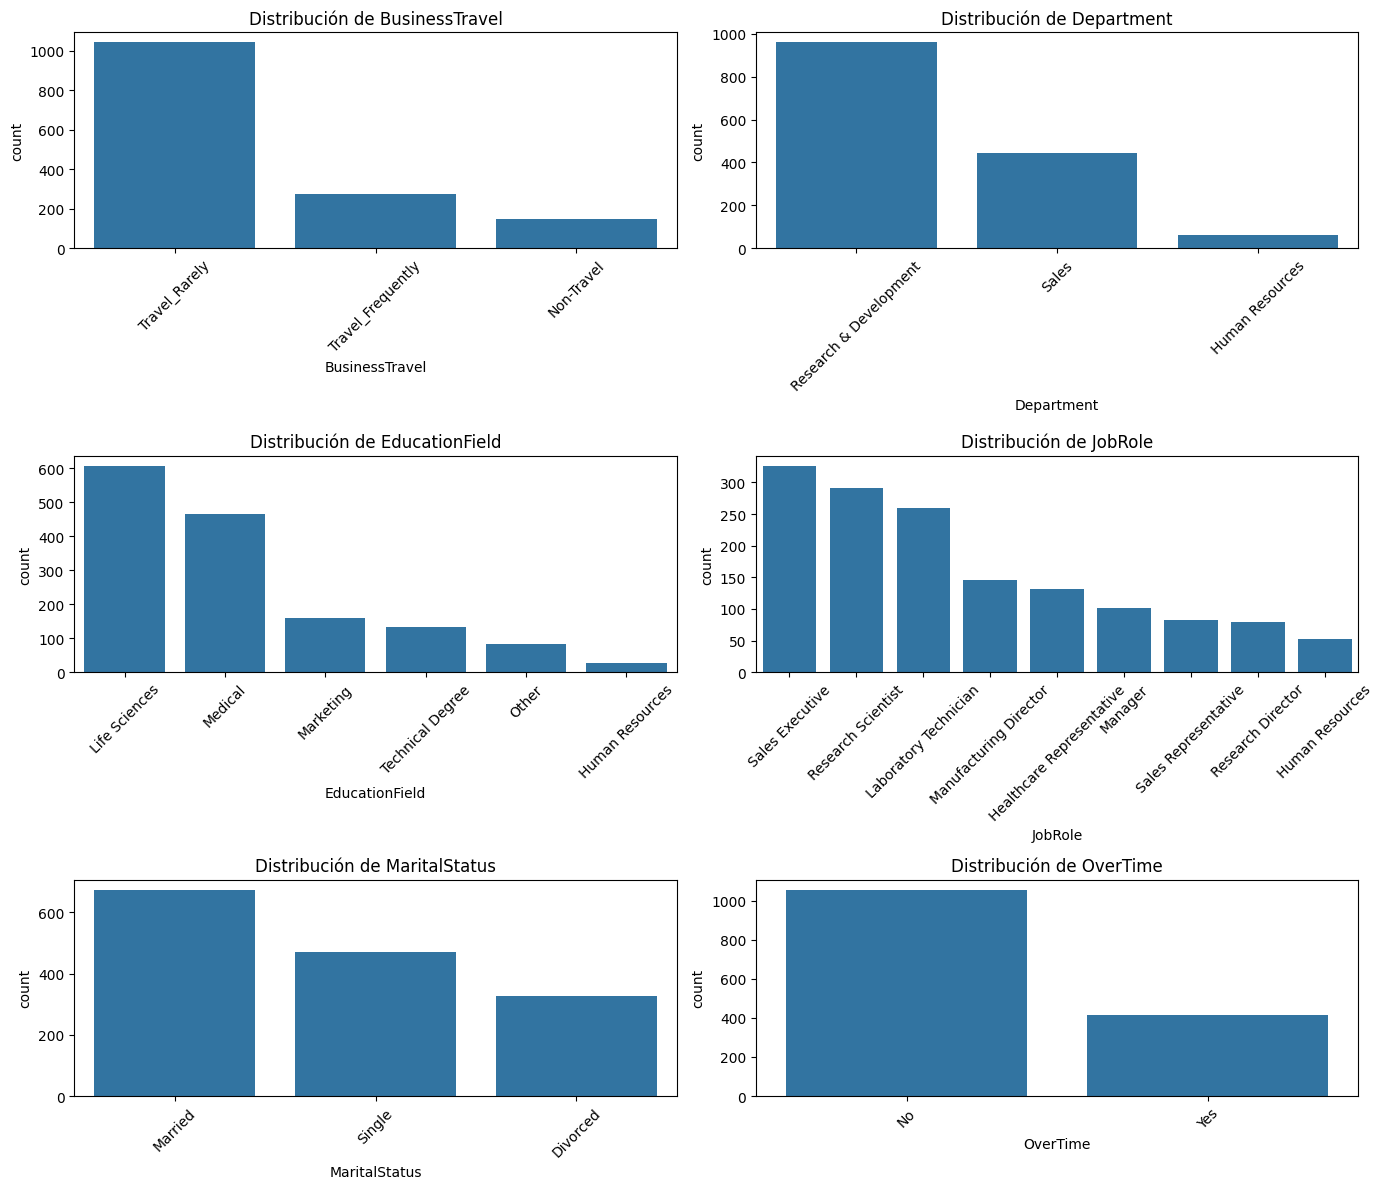

In [23]:
# 2. Resumen estadístico de variables numéricas
num_cols = df_limpio.select_dtypes(include=['int64', 'float64']).columns
print(df_limpio[num_cols].describe())

# Seleccionar columnas categóricas (excluyendo Attrition)
cat_cols = df.select_dtypes(include='object').columns.drop('Attrition')

# Asegúrate de estar usando el DataFrame correcto
df_actual = df_limpio  # o df si no lo habías renombrado

# Redefinir las columnas categóricas reales del DataFrame actual
cat_cols = df_actual.select_dtypes(include='object').columns.drop('Attrition')

# Definir layout
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

# Crear figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

# Crear los countplots
for i, col in enumerate(cat_cols):
    sns.countplot(data=df_actual, x=col, ax=axes[i], order=df_actual[col].value_counts().index)
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


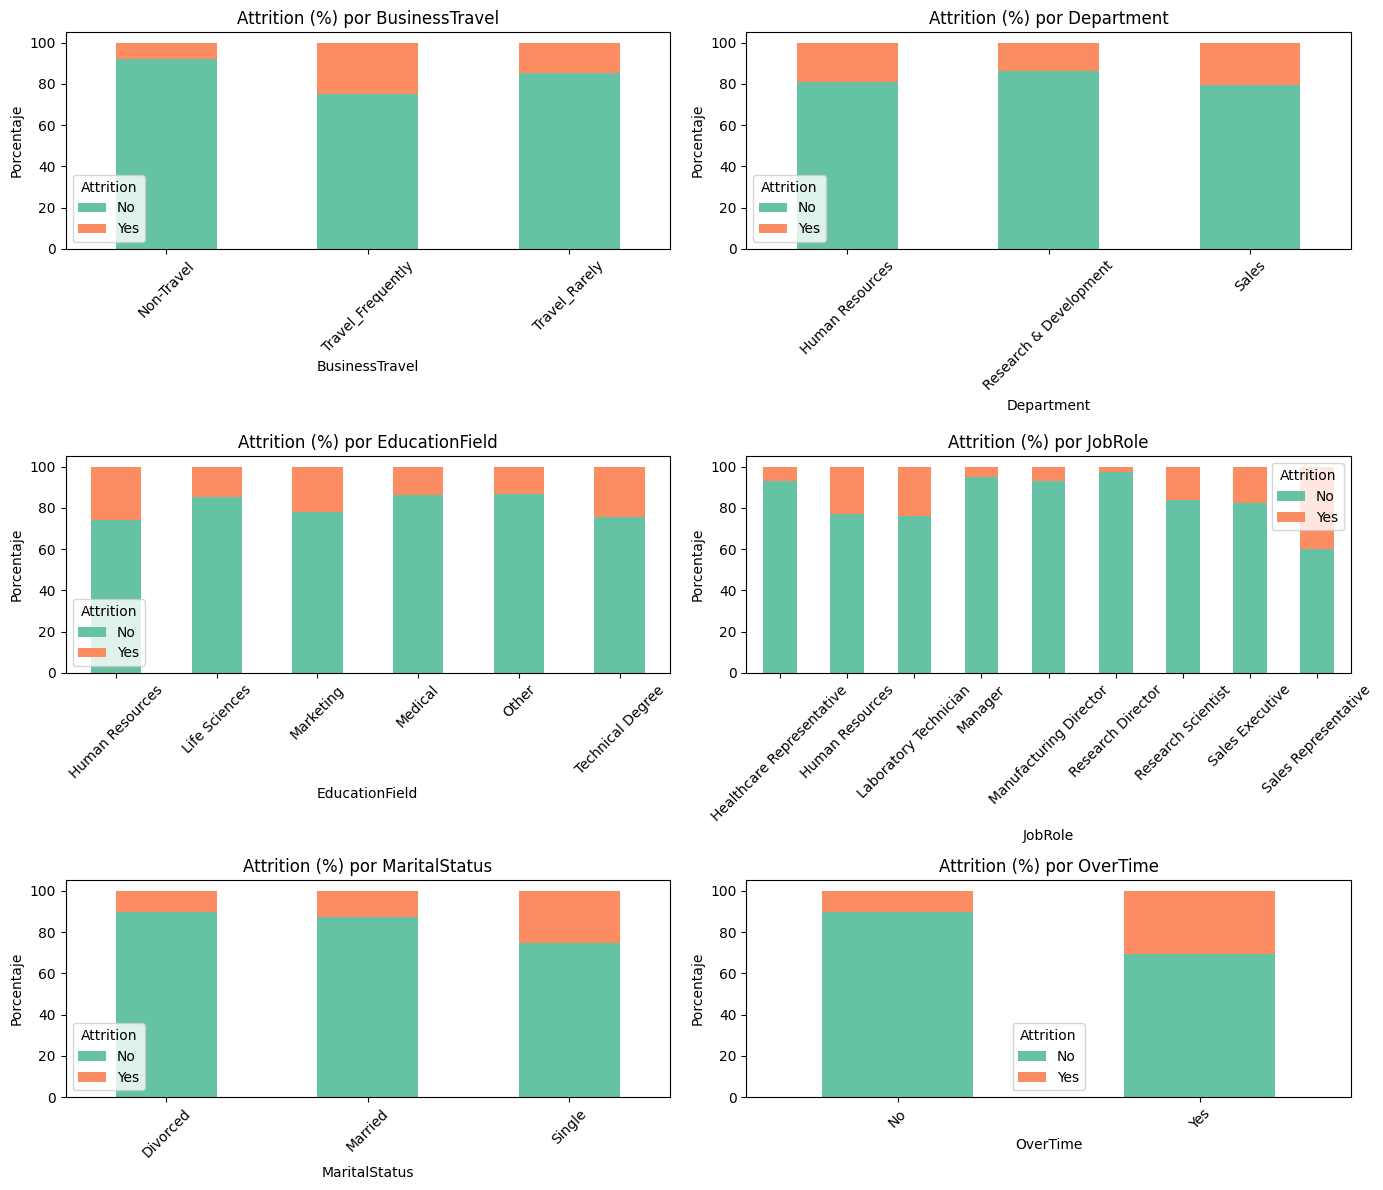

In [24]:
# Definir layout
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

# Crear gráficos de proporciones
for i, col in enumerate(cat_cols):
    # Tabla de contingencia normalizada por filas (por categoría)
    prop_df = pd.crosstab(df_actual[col], df_actual['Attrition'], normalize='index') * 100
    prop_df[['No', 'Yes']].plot(kind='bar', stacked=True, ax=axes[i], color=['#66c2a5', '#fc8d62'])
    axes[i].set_title(f'Attrition (%) por {col}')
    axes[i].set_ylabel('Porcentaje')
    axes[i].legend(title='Attrition')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

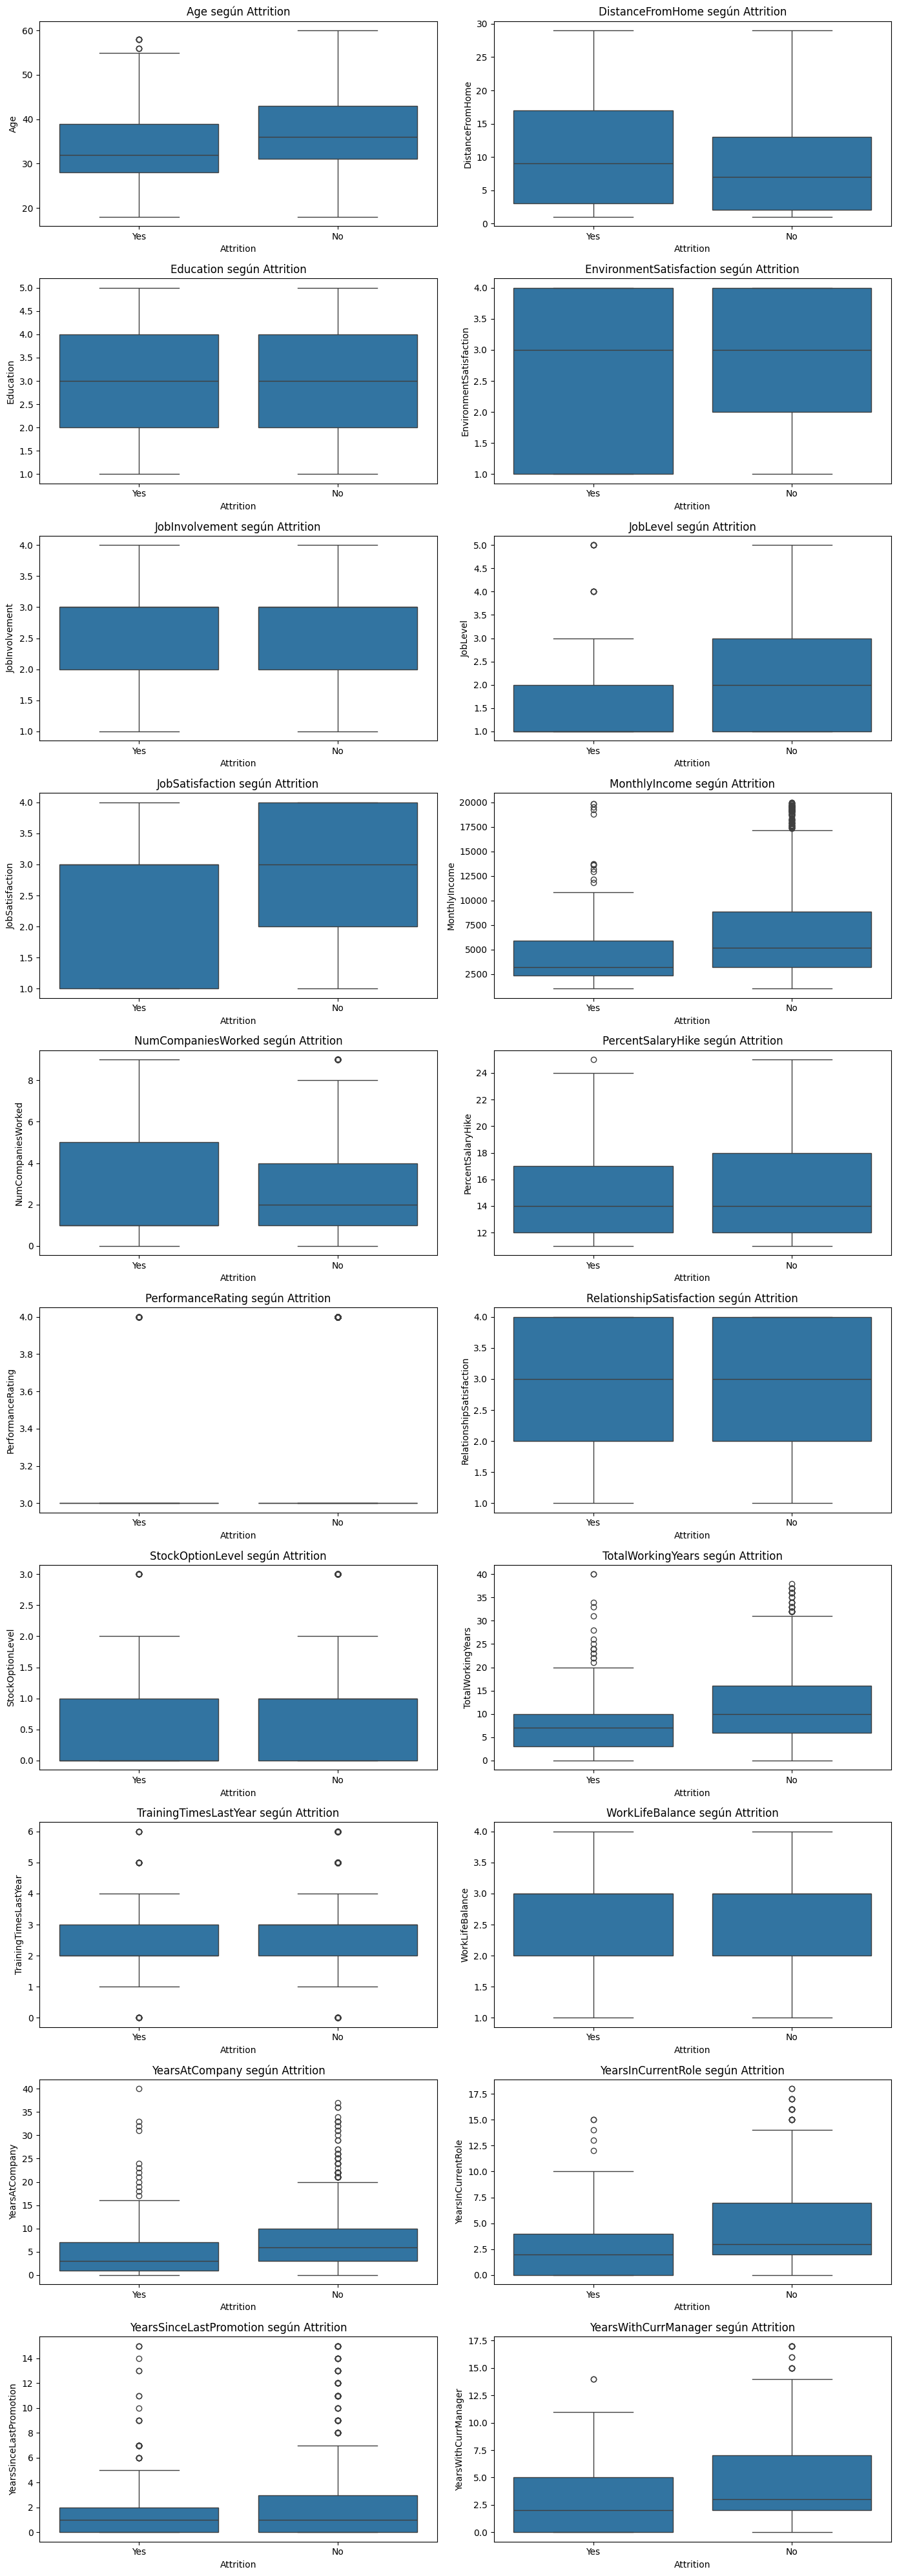

In [ ]:
# 4. Relación numéricas vs Attrition: boxplots
# Definir layout
n_cols = 2
n_rows = (len(num_cols) + 1) // n_cols

# Crear figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

# Crear los boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(x='Attrition', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} según Attrition')
    axes[i].tick_params(axis='x', rotation=0)

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\marij\AppData\Local\Temp\ipykernel_29388\1024923261.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


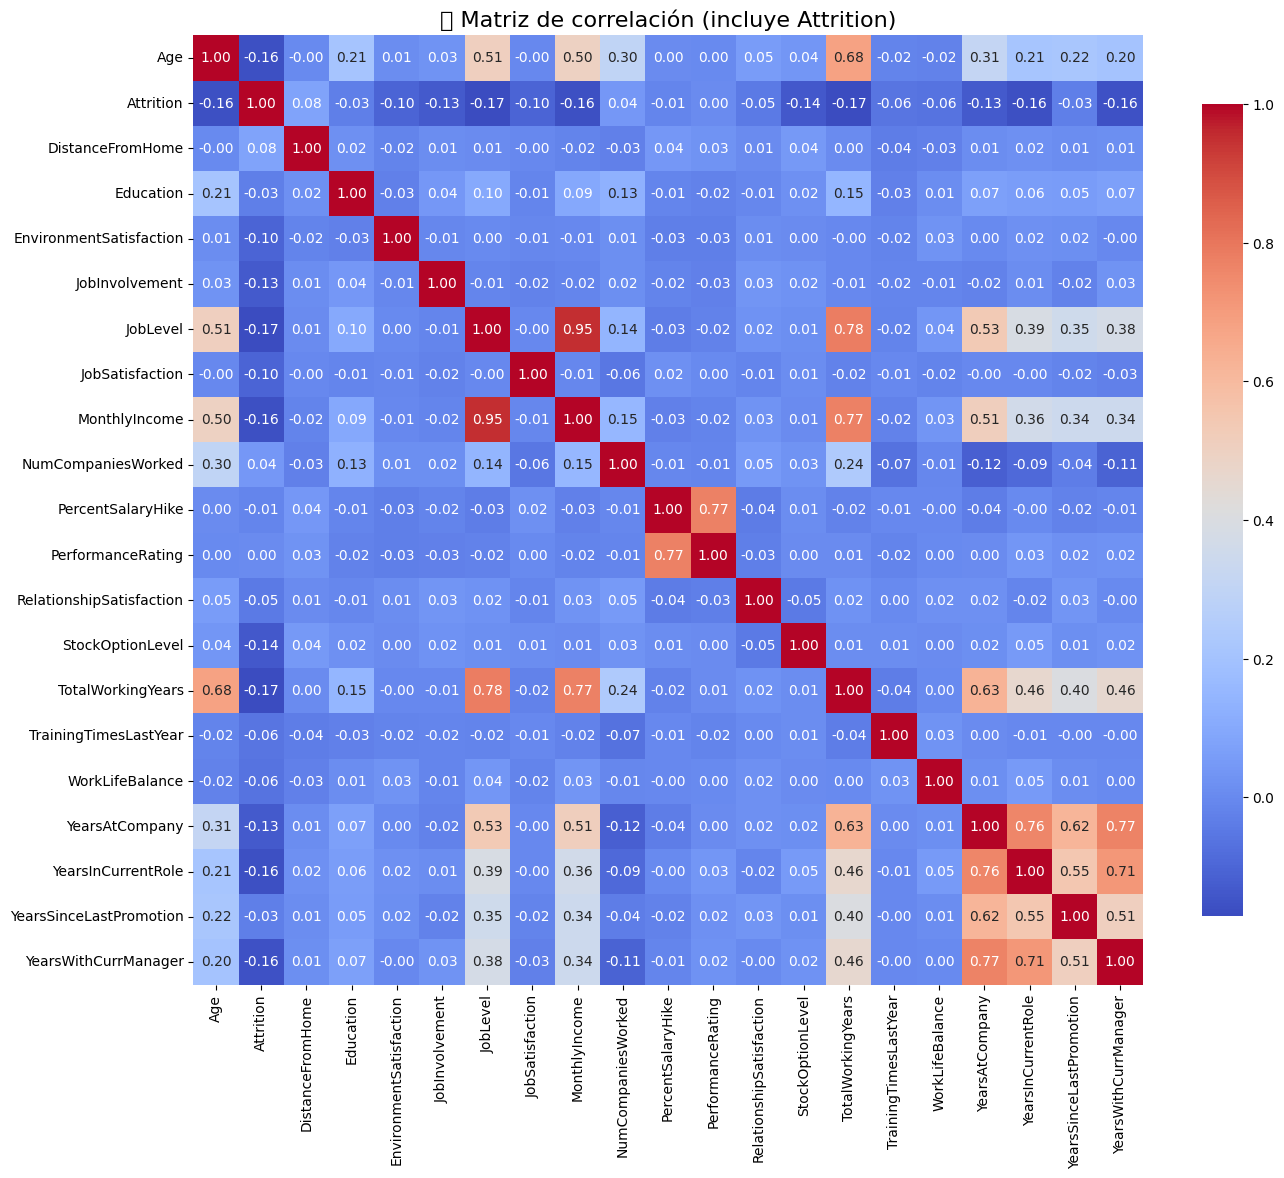

In [26]:
# Crear una copia del DataFrame para no modificar el original
df_corr1 = df_actual.copy()

# Convertir 'Attrition' a valores binarios 0 y 1
df_corr1['Attrition'] = df_corr1['Attrition'].map({'No': 0, 'Yes': 1})

# Seleccionar solo las columnas numéricas (incluye la nueva columna 'Attrition')
num_cols_with_target = df_corr1.select_dtypes(include=['int64', 'float64']).columns

# Calcular matriz de correlación
corr_matrix = df_corr1[num_cols_with_target].corr()

# Crear el heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.title('🔍 Matriz de correlación (incluye Attrition)', fontsize=16)
plt.tight_layout()
plt.show()

In [27]:
# Correlaciones con Attrition
corr_with_attrition = corr_matrix['Attrition'].sort_values(ascending=False)

print("Correlaciones con Attrition:\n")
print(corr_with_attrition)

Correlaciones con Attrition:

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
PerformanceRating           0.002889
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64


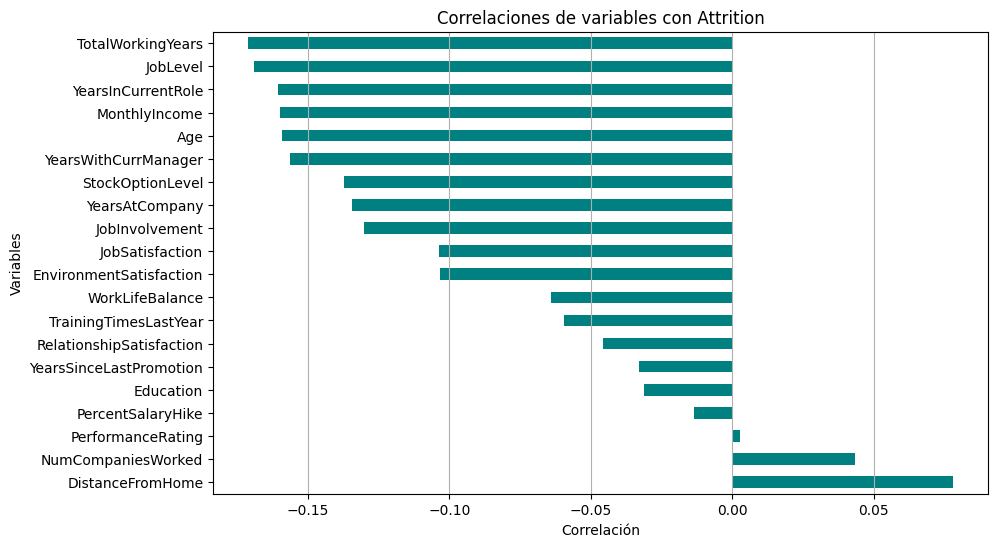

In [28]:
# Correlaciones con Attrition (ya tienes corr_with_attrition)
plt.figure(figsize=(10,6))
corr_with_attrition.drop('Attrition').plot(kind='barh', color='teal')
plt.title('Correlaciones de variables con Attrition')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.grid(axis='x')
plt.show()

In [31]:
# Variables con correlación significativa (umbral > 0.12)
selected_vars = corr_with_attrition[abs(corr_with_attrition) > 0.12].index.drop('Attrition').tolist()
selected_vars

['JobInvolvement',
 'YearsAtCompany',
 'StockOptionLevel',
 'YearsWithCurrManager',
 'Age',
 'MonthlyIncome',
 'YearsInCurrentRole',
 'JobLevel',
 'TotalWorkingYears']

In [35]:
# Analicemos ahora las categóricacs con attrition
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']  # por ejemplo

for col in cat_cols:
    contingency_table = pd.crosstab(df_actual[col], df_actual['Attrition'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'Variable: {col}')
    print(f'p-value: {p:.4f}')
    if p < 0.05:
        print("Relación significativa con Attrition\n")
    else:
        print("No hay relación significativa\n")

Variable: BusinessTravel
p-value: 0.0000
Relación significativa con Attrition

Variable: Department
p-value: 0.0045
Relación significativa con Attrition

Variable: EducationField
p-value: 0.0068
Relación significativa con Attrition

Variable: JobRole
p-value: 0.0000
Relación significativa con Attrition

Variable: MaritalStatus
p-value: 0.0000
Relación significativa con Attrition

Variable: OverTime
p-value: 0.0000
Relación significativa con Attrition



In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Variables categóricas y numéricas
cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']
num_vars = ['JobInvolvement', 'YearsAtCompany', 'StockOptionLevel', 'YearsWithCurrManager',
            'Age', 'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears']

X = df_actual[num_vars + cat_vars]
y = df_actual['Attrition']

# Pipeline para codificar categóricas y dejar numéricas igual
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_vars)
    ], remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.25)

# Modelo con class_weight para balancear clases
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.92      0.79      0.85       309
         Yes       0.36      0.63      0.46        59

    accuracy                           0.76       368
   macro avg       0.64      0.71      0.65       368
weighted avg       0.83      0.76      0.78       368

[[243  66]
 [ 22  37]]


c:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.ensemble import RandomForestClassifier
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vars),
        ('cat', OneHotEncoder(drop='first'), cat_vars)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.25)

model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.97      0.91       309
         Yes       0.50      0.15      0.23        59

    accuracy                           0.84       368
   macro avg       0.68      0.56      0.57       368
weighted avg       0.80      0.84      0.80       368

[[300   9]
 [ 50   9]]


In [44]:
import xgboost as xgb
y = df_actual['Attrition'].map({'Yes': 1, 'No': 0})
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vars),
        ('cat', OneHotEncoder(drop='first'), cat_vars)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.25)

# Procesar datos
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Calcular scale_pos_weight para el desbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Crear el modelo XGBoost con parámetros básicos y scale_pos_weight
model_xgb = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    max_depth=5,
    n_estimators=200,
    learning_rate=0.1
)

model_xgb.fit(X_train_proc, y_train)

y_pred = model_xgb.predict(X_test_proc)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       309
           1       0.37      0.31      0.33        59

    accuracy                           0.80       368
   macro avg       0.62      0.60      0.61       368
weighted avg       0.79      0.80      0.80       368

[[278  31]
 [ 41  18]]


c:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:33:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [47]:
from sklearn.metrics import precision_recall_curve

y_probs = model_xgb.predict_proba(X_test_proc)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Mostrar algunos puntos para ver el trade-off
for p, r, t in zip(precisions[::10], recalls[::10], np.append(thresholds[::10], 1)):
    print(f"Threshold={t:.3f}, Precision={p:.3f}, Recall={r:.3f}")

# Elegir un umbral para intentar un balance (ejemplo: precisión y recall similares)
# Aquí, buscar el umbral donde precision y recall se crucen o están lo más cerca posible
diff = np.abs(precisions - recalls)
best_idx = np.argmin(diff)
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 1.0

print(f"\nUmbral recomendado: {best_threshold:.3f}")

# Predecir con nuevo umbral
y_pred_adj = (y_probs >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_adj))
print(confusion_matrix(y_test, y_pred_adj))

Threshold=0.000, Precision=0.160, Recall=1.000
Threshold=0.001, Precision=0.165, Recall=1.000
Threshold=0.002, Precision=0.170, Recall=1.000
Threshold=0.003, Precision=0.175, Recall=1.000
Threshold=0.004, Precision=0.174, Recall=0.966
Threshold=0.005, Precision=0.179, Recall=0.966
Threshold=0.006, Precision=0.182, Recall=0.949
Threshold=0.009, Precision=0.188, Recall=0.949
Threshold=0.011, Precision=0.194, Recall=0.949
Threshold=0.012, Precision=0.194, Recall=0.915
Threshold=0.014, Precision=0.198, Recall=0.898
Threshold=0.017, Precision=0.198, Recall=0.864
Threshold=0.021, Precision=0.206, Recall=0.864
Threshold=0.024, Precision=0.210, Recall=0.847
Threshold=0.026, Precision=0.219, Recall=0.847
Threshold=0.031, Precision=0.225, Recall=0.831
Threshold=0.037, Precision=0.231, Recall=0.814
Threshold=0.047, Precision=0.232, Recall=0.780
Threshold=0.052, Precision=0.234, Recall=0.746
Threshold=0.061, Precision=0.225, Recall=0.678
Threshold=0.071, Precision=0.226, Recall=0.644
Threshold=0.0

In [48]:
from imblearn.under_sampling import RandomUnderSampler


cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']
num_vars = ['JobInvolvement', 'YearsAtCompany', 'StockOptionLevel', 'YearsWithCurrManager',
            'Age', 'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears']

X = df_actual[num_vars + cat_vars]
y = df_actual['Attrition'].map({'Yes': 1, 'No': 0})

# Preprocesamiento para pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vars),
        ('cat', OneHotEncoder(drop='first'), cat_vars)
    ])

# Dividir antes de undersample para evitar fugas
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.25)

# Pipeline para transformar y clasificar
model = Pipeline([
    ('preprocessor', preprocessor),
    ('under', RandomUnderSampler(random_state=42)),
    ('clf', LogisticRegression(max_iter=5000))
])

# Importante: Para usar undersample dentro pipeline necesitamos hacer un pequeño truco con imblearn
from imblearn.pipeline import Pipeline as ImbPipeline

model = ImbPipeline([
    ('preprocessor', preprocessor),
    ('under', RandomUnderSampler(random_state=42)),
    ('clf', LogisticRegression(max_iter=5000))
])

# Entrenar solo con train (undersample aplicado aquí)
model.fit(X_train, y_train)

# Predecir test (sin undersample aquí)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       309
           1       0.31      0.61      0.41        59

    accuracy                           0.72       368
   macro avg       0.61      0.68      0.61       368
weighted avg       0.81      0.72      0.75       368

[[229  80]
 [ 23  36]]


In [49]:
# Obtener probabilidades clase 1
y_probs = model.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Elegir umbral que dé recall ≥ 0.7 (por ejemplo)
idx = np.argmax(recalls >= 0.7)
best_threshold = thresholds[idx]
print(f"Umbral para recall ≥ 0.7: {best_threshold:.3f}")

# Predicción con nuevo umbral
y_pred_new = (y_probs >= best_threshold).astype(int)

print(classification_report(y_test, y_pred_new))
print(confusion_matrix(y_test, y_pred_new))

Umbral para recall ≥ 0.7: 0.015
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       309
           1       0.16      1.00      0.28        59

    accuracy                           0.16       368
   macro avg       0.08      0.50      0.14       368
weighted avg       0.03      0.16      0.04       368

[[  0 309]
 [  0  59]]


c:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

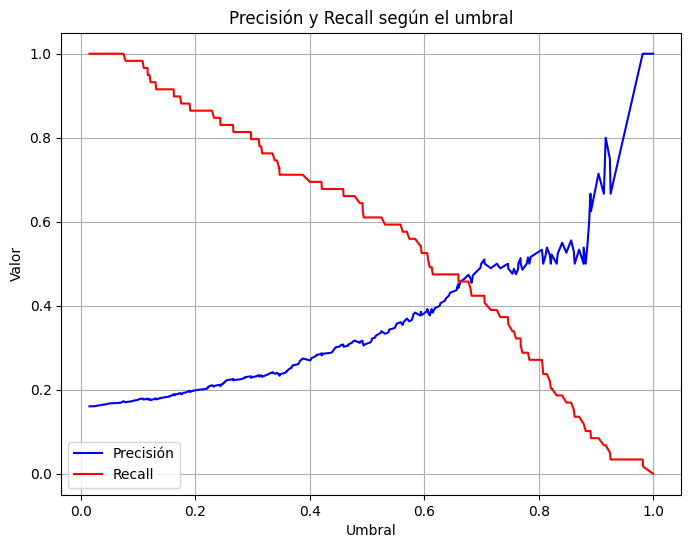

Umbral | Precision | Recall | F1-score
0.30   | 0.23    | 0.80 | 0.36
0.35   | 0.24    | 0.71 | 0.36
0.40   | 0.27    | 0.69 | 0.39
0.45   | 0.30    | 0.68 | 0.42
0.50   | 0.31    | 0.61 | 0.41
0.55   | 0.35    | 0.59 | 0.44
0.60   | 0.38    | 0.53 | 0.44
0.65   | 0.44    | 0.47 | 0.46
0.70   | 0.51    | 0.42 | 0.46
0.75   | 0.48    | 0.34 | 0.40


In [55]:
y_probs = model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Ajustamos el array de thresholds para que tenga la misma longitud que precisions y recalls
thresholds = np.append(thresholds, 1)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precisión', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='red')
plt.xlabel('Umbral')
plt.ylabel('Valor')
plt.title('Precisión y Recall según el umbral')
plt.legend()
plt.grid(True)
plt.show()

# Evaluar métricas para varios umbrales específicos
print("Umbral | Precision | Recall | F1-score")
for thr in np.arange(0.3, 0.8, 0.05):
    y_pred_thr = (y_probs >= thr).astype(int)
    report = classification_report(y_test, y_pred_thr, output_dict=True)
    print(f"{thr:.2f}   | {report['1']['precision']:.2f}    | {report['1']['recall']:.2f} | {report['1']['f1-score']:.2f}")

In [56]:
umbral = 0.55
y_pred_umbral = (y_probs >= umbral).astype(int)

print(f"Reporte para umbral {umbral}:")
print(classification_report(y_test, y_pred_umbral))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_umbral))

Reporte para umbral 0.55:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       309
           1       0.35      0.59      0.44        59

    accuracy                           0.76       368
   macro avg       0.63      0.69      0.65       368
weighted avg       0.82      0.76      0.78       368

Matriz de confusión:
[[245  64]
 [ 24  35]]


In [57]:
umbral = 0.45
y_pred_low = (y_probs >= umbral).astype(int)

print(f"Reporte para umbral {umbral}:")
print(classification_report(y_test, y_pred_low))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_low))

Reporte para umbral 0.45:
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       309
           1       0.30      0.68      0.42        59

    accuracy                           0.70       368
   macro avg       0.61      0.69      0.61       368
weighted avg       0.82      0.70      0.74       368

Matriz de confusión:
[[217  92]
 [ 19  40]]


In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear', 'saga'],  # soportan l1 y l2
    'clf__class_weight': [None, 'balanced'],
    'clf__max_iter': [1000, 5000]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score F1:", grid_search.best_score_)

# Evaluar en test con mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores parámetros: {'clf__C': 1, 'clf__class_weight': None, 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Mejor score F1: 0.472101735880276
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       309
           1       0.32      0.63      0.42        59

    accuracy                           0.72       368
   macro avg       0.61      0.68      0.62       368
weighted avg       0.82      0.72      0.75       368

[[229  80]
 [ 22  37]]


In [77]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix

num_vars = ['JobInvolvement', 'YearsAtCompany', 'StockOptionLevel',
            'YearsWithCurrManager', 'Age', 'MonthlyIncome', 'YearsInCurrentRole',
            'JobLevel', 'TotalWorkingYears']
cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

X = df_actual[num_vars + cat_vars]
y = df_actual['Attrition'].map({'Yes':1, 'No':0})

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vars),
        ('cat', OneHotEncoder(drop='first'), cat_vars)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

model_rf = ImbPipeline([
    ('preprocessor', preprocessor),
    ('under', RandomUnderSampler(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

model_rf.fit(X_train, y_train)

y_probs_rf = model_rf.predict_proba(X_test)[:, 1]

umbral = 0.45
y_pred_rf = (y_probs_rf >= umbral).astype(int)

print(f"Reporte Random Forest para umbral {umbral}:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

Reporte Random Forest para umbral 0.45:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       309
           1       0.28      0.69      0.40        59

    accuracy                           0.66       368
   macro avg       0.60      0.68      0.58       368
weighted avg       0.82      0.66      0.71       368

Matriz de confusión:
[[203 106]
 [ 18  41]]


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

# Pipeline
pipeline_rf = ImbPipeline([
    ('preprocessor', preprocessor),
    ('under', RandomUnderSampler(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Grid de hiperparámetros
param_grid_rf = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [5, 10, None],
    'clf__min_samples_split': [2, 5],
    'clf__max_features': ['sqrt', 'log2', None],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__bootstrap': [True, False]
}

# Configurar validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch con scoring enfocado en recall de clase positiva (los que se van)
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring='recall',  # podemos cambiar a 'f1' o 'roc_auc'
    n_jobs=-1,
    verbose=2
)

# Entrenar con CV (solo sobre train)
grid_search_rf.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados:")
print(grid_search_rf.best_params_)

print("\nMejor score (recall) promedio en CV:")
print(grid_search_rf.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Mejores parámetros encontrados:
{'clf__bootstrap': True, 'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}

Mejor score (recall) promedio en CV:
0.7025396825396826


In [95]:
best_rf_model = grid_search_rf.best_estimator_

# Predecir probabilidades
y_probs_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Ajustar umbral si quieres más recall
umbral = 0.45
y_pred_rf = (y_probs_rf >= umbral).astype(int)

# Evaluación
print(f"📈 Reporte para Random Forest (umbral {umbral}):")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

📈 Reporte para Random Forest (umbral 0.45):
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       309
           1       0.29      0.68      0.40        59

    accuracy                           0.68       368
   macro avg       0.60      0.68      0.59       368
weighted avg       0.82      0.68      0.72       368

Matriz de confusión:
[[210  99]
 [ 19  40]]


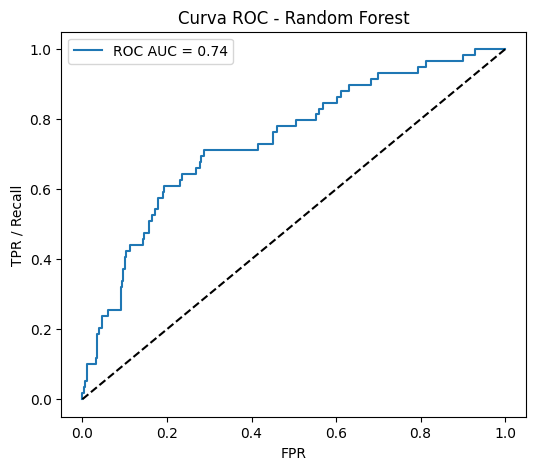

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
roc_auc = roc_auc_score(y_test, y_probs_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR / Recall")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()

In [93]:
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring='roc_auc',  # ahora optimizamos AUROC
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search_rf.best_params_)

print("\nMejor score (ROC AUC) promedio en CV:")
print(grid_search_rf.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros encontrados:
{'clf__max_depth': 5, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}

Mejor score (ROC AUC) promedio en CV:
0.7799181215376867


In [86]:
# Extraer importancias del modelo entrenado dentro del pipeline
rf_clf = best_rf_model.named_steps['clf']
# Obtener nombres tras el one-hot encoding
ohe = best_rf_model.named_steps['preprocessor'].named_transformers_['cat']
cat_encoded = ohe.get_feature_names_out(cat_vars)
all_features = num_vars + list(cat_encoded)

importances = rf_clf.feature_importances_
feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)

# Mostrar las 10 más importantes
feat_imp.head(10)

,Feature,Importance
5,MonthlyIncome,0.124972
4,Age,0.115643
8,TotalWorkingYears,0.088880
3,YearsWithCurrManager,0.071855
6,YearsInCurrentRole,0.069490
28,OverTime_Yes,0.067890
2,StockOptionLevel,0.067809
1,YearsAtCompany,0.067281
0,JobInvolvement,0.048593
7,JobLevel,0.034962


In [82]:
from sklearn.linear_model import LogisticRegression

pipeline_lr = ImbPipeline([
    ('preprocessor', preprocessor),
    ('under', RandomUnderSampler(random_state=42)),
    ('clf', LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=5000))
])

param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

grid_search_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid_lr,
    cv=cv,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

grid_search_lr.fit(X_train, y_train)
# Resultados
print("Mejores parámetros encontrados:")
print(grid_search_lr.best_params_)

print("\nMejor score (recall) promedio en CV:")
print(grid_search_lr.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores parámetros encontrados:
{'clf__C': 0.01, 'clf__penalty': 'l2'}

Mejor score (recall) promedio en CV:
0.7641269841269842


In [88]:
# Predecir probabilidades y ajustar umbral si quieres
best_model = grid_search_lr.best_estimator_  # o grid_rf.best_estimator_

y_probs = best_model.predict_proba(X_test)[:,1]
umbral = 0.45
y_pred = (y_probs >= umbral).astype(int)

print(f"\n📈 Reporte final con umbral {umbral}:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


📈 Reporte final con umbral 0.45:
              precision    recall  f1-score   support

           0       0.91      0.45      0.60       309
           1       0.21      0.78      0.33        59

    accuracy                           0.50       368
   macro avg       0.56      0.61      0.47       368
weighted avg       0.80      0.50      0.56       368

[[138 171]
 [ 13  46]]


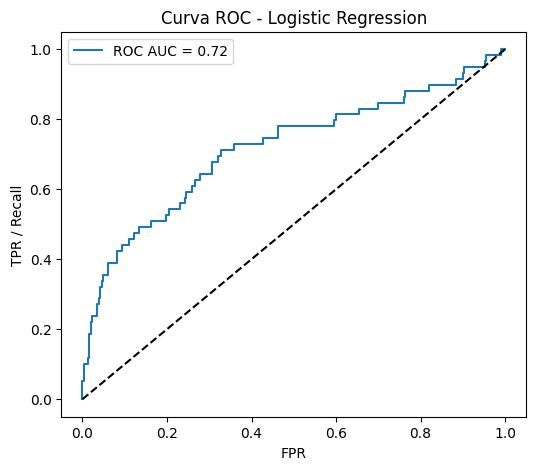

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR / Recall")
plt.title("Curva ROC - Logistic Regression")
plt.legend()
plt.show()

In [91]:
# Extraer coeficientes
clf = best_model.named_steps['clf']
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coeficiente': clf.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print(coef_df.head(10))

                                   Feature  Coeficiente
28                       cat__OverTime_Yes     0.189755
2                    num__StockOptionLevel    -0.174643
0                      num__JobInvolvement    -0.159279
3                num__YearsWithCurrManager    -0.132710
26              cat__MaritalStatus_Married    -0.126490
4                                 num__Age    -0.117926
6                  num__YearsInCurrentRole    -0.117714
27               cat__MaritalStatus_Single     0.088618
11  cat__Department_Research & Development    -0.087790
23         cat__JobRole_Research Scientist    -0.064765


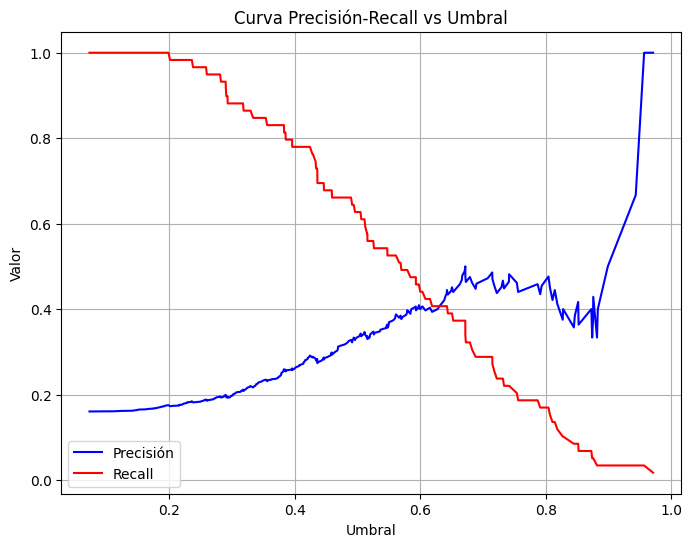

In [96]:
from sklearn.metrics import precision_recall_curve

# Probabilidades predichas para la clase positiva
probs = grid_search_rf.best_estimator_.predict_proba(X_test)[:, 1]

# Obtener precisión, recall y umbrales
precision, recall, thresholds = precision_recall_curve(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precisión', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='r')
plt.xlabel('Umbral')
plt.ylabel('Valor')
plt.title('Curva Precisión-Recall vs Umbral')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
# probs, precision, recall, thresholds ya calculados con precision_recall_curve

# Buscamos el índice donde recall >= 0.8 y precision sea lo más alta posible
idxs = np.where(recall[:-1] >= 0.8)[0]

if len(idxs) > 0:
    best_idx = idxs[np.argmax(precision[:-1][idxs])]
    best_threshold = thresholds[best_idx]
    print(f"Umbral elegido: {best_threshold:.3f} con Recall={recall[best_idx]:.3f} y Precision={precision[best_idx]:.3f}")
else:
    print("No se encontró un umbral con recall >= 0.8")

Umbral elegido: 0.383 con Recall=0.831 y Precision=0.259
